In [20]:
# @title Setup
from google.cloud import bigquery
from google.colab import data_table
import bigframes.pandas as bpd

project = 'postechanalyticsfase3' # Project ID inserted based on the query results selected to explore
location = 'southamerica-east1' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=postechanalyticsfase3:southamerica-east1:bquxjob_43629818_195ac151f4c)
back to BigQuery to edit the query within the BigQuery user interface.

In [21]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_2ccf0864_195b1216d0c') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT '112020' as MesAno
        ,COUNT(CASE WHEN B005 = 1 THEN (CASE E001 WHEN 1 THEN 1 ELSE null END) ELSE NULL END) Emprestimo
        ,COUNT(CASE WHEN B005 = 1 THEN (CASE E001 WHEN 2 THEN 2 ELSE null END) ELSE NULL END) Solicitou
        ,COUNT(CASE WHEN B005 = 1 THEN (CASE E001 WHEN 3 THEN 3 ELSE null END) ELSE NULL END) NaoEmprestimo
        ,COUNT(CASE WHEN B005 = 1 THEN 1 END) Total
        ,(COUNT(CASE WHEN B005 = 1 THEN (CASE E001 WHEN 1 THEN 1 ELSE null END) ELSE NULL END) / COUNT(CASE WHEN B005 = 1 THEN 1 END)) *100 as PercentualEmprestimoParaSolicitantes
        ,COUNT(*) QtdTotalRespondentes
FROM `PNAD_COVID.PNAD_COVID_112020` 
UNION ALL
SELECT '102020' as MesAno
        ,COUNT(CASE WHEN B005 = 1 THEN (CASE E001 WHEN 1 THEN 1 ELSE null END) ELSE NULL END)  Emprestimo
        ,COUNT(CASE WHEN B005 = 1 THEN (CASE E001 WHEN 2 THEN 2 ELSE null END) ELSE NULL END) Solicitou
        ,COUNT(CASE WHEN B005 = 1 THEN (CASE E001 WHEN 3 THEN 3 ELSE null END) ELSE NULL END) NaoEmpres

# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API. The read_gbq_table [method](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.pandas#bigframes_pandas_read_gbq_function) turns a BigQuery table into the BigFrames DataFrame.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [28]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_6b303675_195b1249573') # Job ID inserted based on the query results selected to explore
destination = job.destination

# Load data from a BigQuery table using BigFrames DataFrames:
bq_df = bpd.read_gbq(f"{destination.project}.{destination.dataset_id}.{destination.table_id}")
bq_df = bq_df.sort_values(by='MesAno')
bq_df['Concedido'] = bq_df['Emprestimo'] + bq_df['Solicitou']
bq_df

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Reading cached table from 2025-03-20 01:22:21.179948+00:00 to avoid incompatibilies with previous reads of this table. To read the latest version, set `use_cache=False` or close the current session with Session.close() or bigframes.pandas.close_session().
  exec(code_obj, self.user_global_ns, self.user_ns)


,MesAno,Emprestimo,Solicitou,NaoEmprestimo,Total,PercentualEmprestimoParaSolicitantes,QtdTotalRespondentes,Concedido
2,072020,11,5,249,265,4.150943,384166,16
1,082020,25,5,223,253,9.881423,386520,30
0,092020,14,2,183,199,7.035176,387298,16
3,102020,20,6,156,182,10.989011,380461,26
4,112020,26,7,165,198,13.131313,381438,33


## Show descriptive statistics using describe()
Use the ```DataFrame.describe()```
[method](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.dataframe.DataFrame#bigframes_dataframe_DataFrame_describe)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
# Generate descriptive statistics.
bq_df.describe()

,Emprestimo,Solicitou,NaoEmprestimo,Total,PercentualEmprestimo
count,5.0,5.0,5.0,5.0,5.0
mean,19.2,5.0,195.2,219.4,9.037573
std,6.610598,1.870829,39.575245,37.017563,3.505982
min,11.0,2.0,156.0,182.0,4.150943
25%,14.0,5.0,165.0,198.0,7.035176
50%,20.0,5.0,183.0,199.0,9.881423
75%,25.0,6.0,223.0,253.0,10.989011
max,26.0,7.0,249.0,265.0,13.131313


In [ ]:
# Convert BigQuery DataFrame to pandas DataFrame.
pandas_df = bq_df.to_pandas()

<Figure size 1200x600 with 0 Axes>

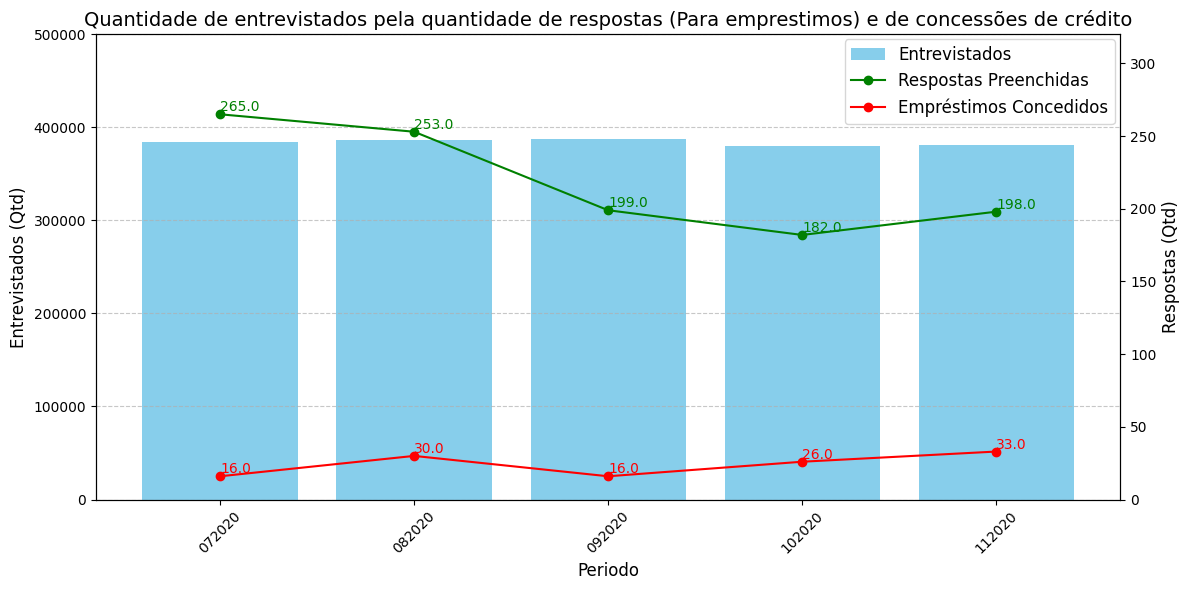

In [36]:
import matplotlib.pyplot as plt

# Configurar o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras para a coluna "total" no eixo principal
fig, ax1 = plt.subplots(figsize=(12, 6))  # Define o eixo principal
ax1.bar(bq_df['MesAno'], bq_df['QtdTotalRespondentes'], color='skyblue', label='Entrevistados')
ax1.set_xlabel('Periodo', fontsize=12)
ax1.set_ylim(0,500000)
ax1.set_ylabel('Entrevistados (Qtd)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Criar o eixo secundário para as linhas
ax2 = ax1.twinx()  # Define o eixo secundário
linha1, = ax2.plot(bq_df['MesAno'], bq_df['Total'], color='green', marker='o', label='Respostas Preenchidas')
for x, y in zip(bq_df['MesAno'], bq_df['Total']):
    ax2.text(x, y, f'{y:.1f}', ha='left', va='bottom', fontsize=10, color='green')
linha2, = ax2.plot(bq_df['MesAno'], bq_df['Concedido'], color='red', marker='o', label='Empréstimos Concedidos')
for x, y in zip(bq_df['MesAno'], bq_df['Concedido']):
    ax2.text(x, y, f'{y:.1f}', ha='left', va='bottom', fontsize=10, color='red')
ax2.set_ylabel('Respostas (Qtd)', fontsize=12)
ax2.set_ylim(0,320)
#ax2.legend()

# Adicionar título e legenda
plt.title('Quantidade de entrevistados pela quantidade de respostas (Para emprestimos) e de concessões de crédito', fontsize=14)
fig.legend(loc='upper right', bbox_to_anchor=(0.94, 0.94), fontsize=12)

# Mostrar o gráfico
plt.tight_layout()
plt.show()